In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#importing packages for dynamic visualisations 
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os
import numpy as np

#init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('data_cleaned_w_sentiment.csv')

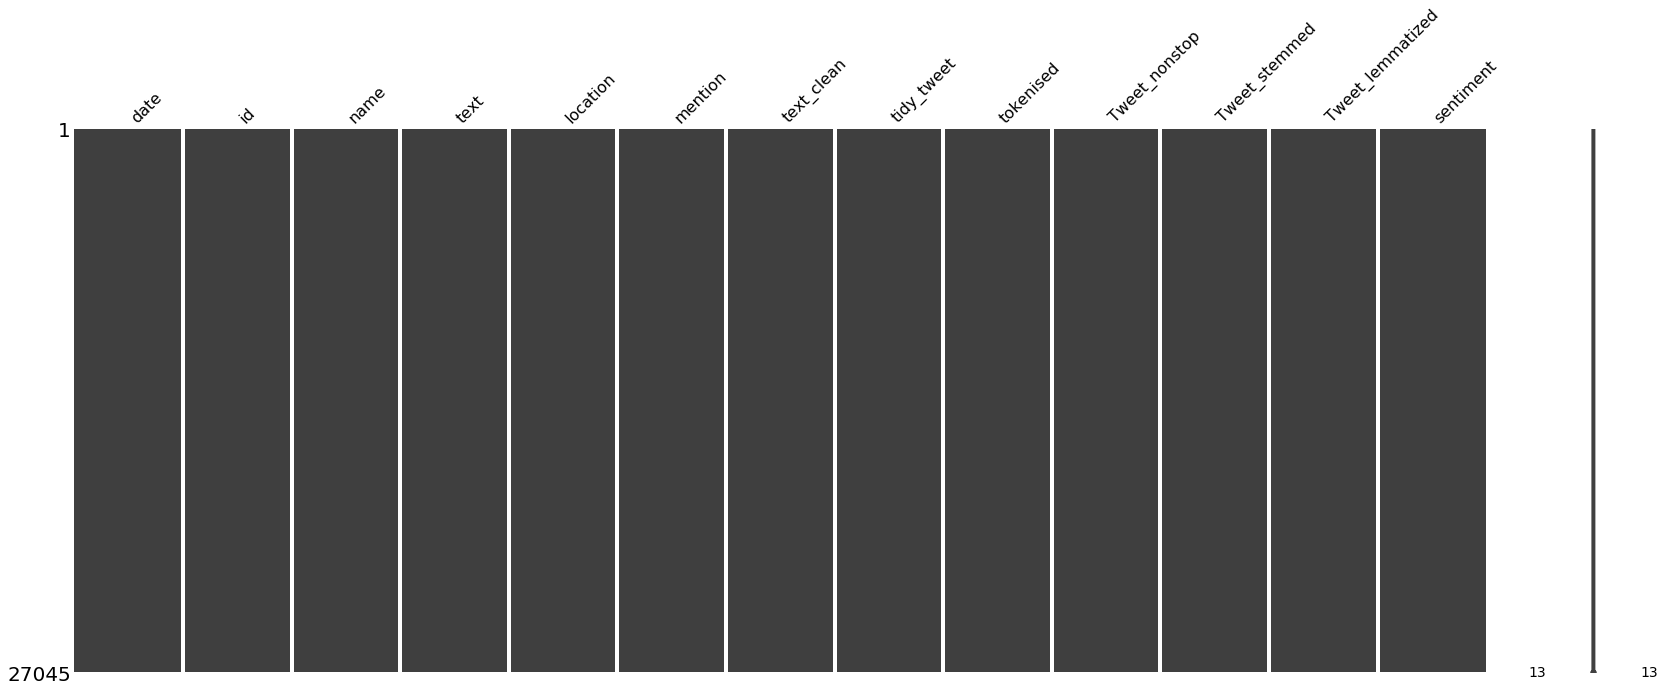

In [3]:
import missingno as msno
# Checking missing values
msno.matrix(df);

In [4]:
df.date = pd.to_datetime(df.date)
df.head()

,date,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment
0,2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'histori', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...",0.0000
1,2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"['working', 'love', 'happy', 'year', 'bitcoin'...","['working', 'love', 'happy', 'year', 'bitcoin'...","['work', 'love', 'happi', 'year', 'bitcoin', '...","['working', 'love', 'happy', 'year', 'bitcoin'...",0.8360
2,2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...,"['hasn', 'dawned', 'that', 'write', 'about', '...","['dawned', 'write', 'splinter', 'groups', 'wri...","['dawn', 'write', 'splinter', 'group', 'write'...","['dawned', 'write', 'splinter', 'group', 'writ...",0.4588
3,2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin,"['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']",0.0000
4,2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...,"['bitcoin', 'like', 'religion', 'that', 'kinda...","['bitcoin', 'like', 'religion', 'kinda', 'poin...","['bitcoin', 'like', 'religion', 'kinda', 'poin...","['bitcoin', 'like', 'religion', 'kinda', 'poin...",0.6486


In [5]:
df.isnull().sum()

date                0
id                  0
name                0
text                0
location            0
mention             0
text_clean          0
tidy_tweet          0
tokenised           0
Tweet_nonstop       0
Tweet_stemmed       0
Tweet_lemmatized    0
sentiment           0
dtype: int64

In [6]:
# dropping NaN values
df.dropna(inplace=True)
df.isnull().sum()

date                0
id                  0
name                0
text                0
location            0
mention             0
text_clean          0
tidy_tweet          0
tokenised           0
Tweet_nonstop       0
Tweet_stemmed       0
Tweet_lemmatized    0
sentiment           0
dtype: int64

In [7]:
df['day_of_week'] = df.date.dt.weekday_name
df.head()

,date,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment,day_of_week
0,2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'histori', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...",0.0000,Monday
1,2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"['working', 'love', 'happy', 'year', 'bitcoin'...","['working', 'love', 'happy', 'year', 'bitcoin'...","['work', 'love', 'happi', 'year', 'bitcoin', '...","['working', 'love', 'happy', 'year', 'bitcoin'...",0.8360,Monday
2,2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...,"['hasn', 'dawned', 'that', 'write', 'about', '...","['dawned', 'write', 'splinter', 'groups', 'wri...","['dawn', 'write', 'splinter', 'group', 'write'...","['dawned', 'write', 'splinter', 'group', 'writ...",0.4588,Monday
3,2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin,"['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']",0.0000,Monday
4,2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...,"['bitcoin', 'like', 'religion', 'that', 'kinda...","['bitcoin', 'like', 'religion', 'kinda', 'poin...","['bitcoin', 'like', 'religion', 'kinda', 'poin...","['bitcoin', 'like', 'religion', 'kinda', 'poin...",0.6486,Monday


In [8]:
df.set_index('date', inplace = True)

In [9]:
df.head()

,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment,day_of_week
date,,,,,,,,,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'histori', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...",0.0000,Monday
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"['working', 'love', 'happy', 'year', 'bitcoin'...","['working', 'love', 'happy', 'year', 'bitcoin'...","['work', 'love', 'happi', 'year', 'bitcoin', '...","['working', 'love', 'happy', 'year', 'bitcoin'...",0.8360,Monday
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...,"['hasn', 'dawned', 'that', 'write', 'about', '...","['dawned', 'write', 'splinter', 'groups', 'wri...","['dawn', 'write', 'splinter', 'group', 'write'...","['dawned', 'write', 'splinter', 'group', 'writ...",0.4588,Monday
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin,"['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']","['hmmm', 'guess', 'bitcoin']",0.0000,Monday
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...,"['bitcoin', 'like', 'religion', 'that', 'kinda...","['bitcoin', 'like', 'religion', 'kinda', 'poin...","['bitcoin', 'like', 'religion', 'kinda', 'poin...","['bitcoin', 'like', 'religion', 'kinda', 'poin...",0.6486,Monday


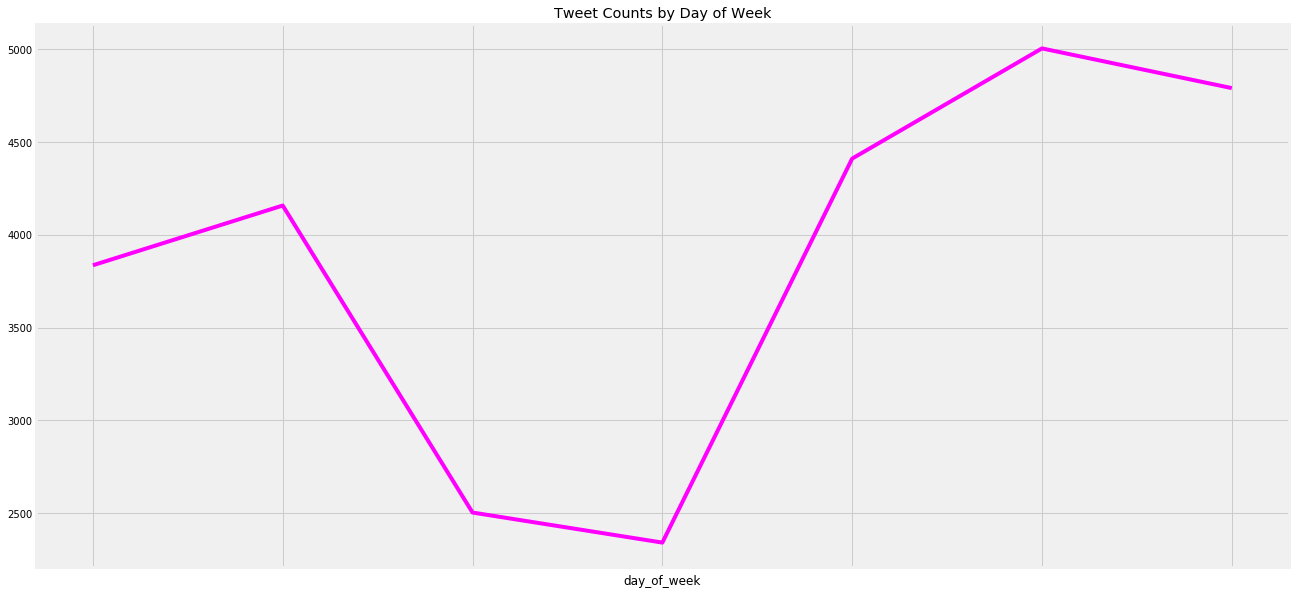

In [10]:
#Number of tweets daily
plt.subplots(figsize=(20,10))
dof_tweets = df.groupby(df.day_of_week).size()
dof_tweets.plot(title='Tweet Counts by Day of Week', colormap='spring');
plt.savefig('Tweet_Counts_by_Day_of_Week.png')

In [11]:
gk = df.groupby('day_of_week').size()

In [12]:
gk

day_of_week
Friday       3836
Monday       4158
Saturday     2503
Sunday       2341
Thursday     4411
Tuesday      5005
Wednesday    4791
dtype: int64

In [13]:
gk

day_of_week
Friday       3836
Monday       4158
Saturday     2503
Sunday       2341
Thursday     4411
Tuesday      5005
Wednesday    4791
dtype: int64

In [14]:
gk_order =[ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']

In [15]:
gk = gk.reindex(gk_order)

In [16]:
# Creating trace1
trace1 = go.Scatter(
                    x = gk.index,
                    y = gk,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= gk.index)
# # Creating trace2
# trace2 = go.Scatter(
#                     x = df.world_rank,
#                     y = df.teaching,
#                     mode = "lines+markers",
#                     name = "teaching",
#                     marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
#                     text= df.university_name)
data = [trace1] #, trace2]
layout = dict(title = 'Tweet Counts by Day of Week',
              xaxis= dict(title= 'Day of week',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)
plt.savefig('Tweet_Counts_by_Day_of_Week.png')

<Figure size 432x288 with 0 Axes>

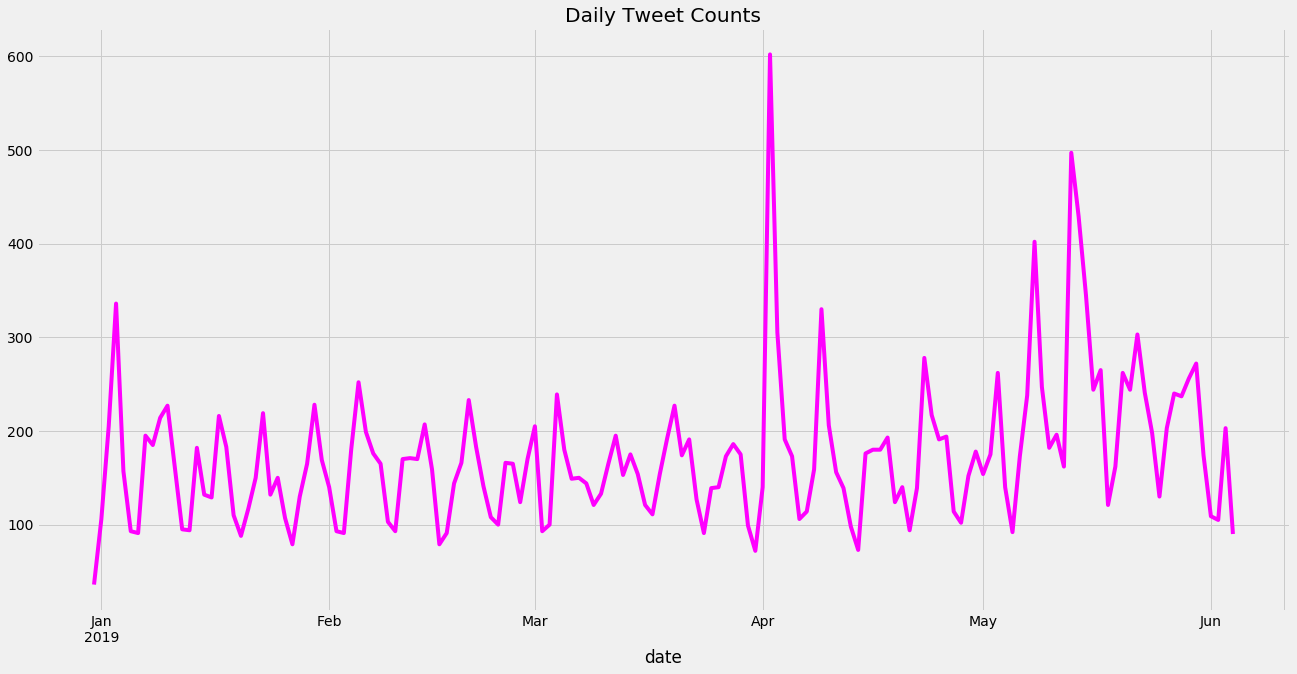

In [136]:
#Number of tweets daily
plt.subplots(figsize=(20,10))
daily_tweets = df.groupby(df.index).size()
daily_tweets.plot(title='Daily Tweet Counts', colormap='spring');

In [137]:
data = [go.Scatter( x=daily_tweets.index, y=daily_tweets )]
iplot(data, filename='pandas-time-series')

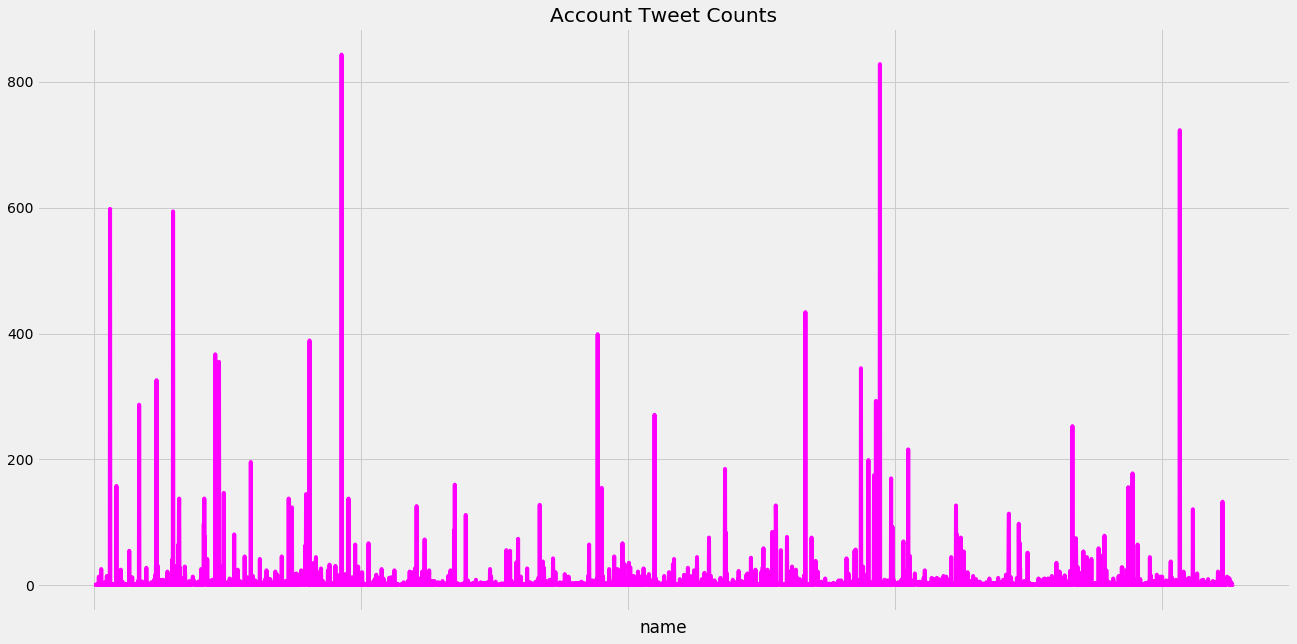

In [134]:
#Number of tweets daily
plt.subplots(figsize=(20,10))
name_tweets = df.groupby(df.name).size()
name_tweets.plot(title='Account Tweet Counts', colormap='spring');

In [139]:
data = [go.Scatter( x=name_tweets.index, y=name_tweets )]
iplot(data, filename='pandas-time-series')

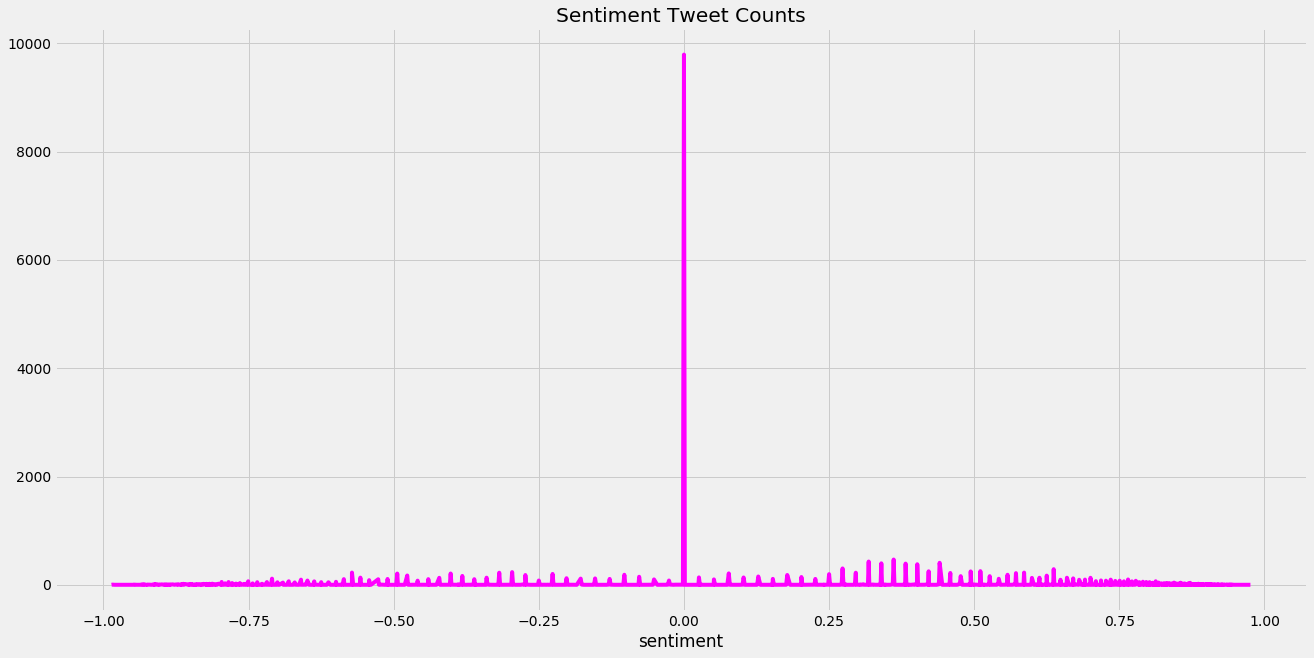

In [135]:
#Number of tweets daily
plt.subplots(figsize=(20,10))
sentim_tweets = df.groupby(df.sentiment).size()
sentim_tweets.plot(title='Sentiment Tweet Counts', colormap='spring');

In [140]:
data = [go.Scatter( x=sentim_tweets.index, y=sentim_tweets )]
iplot(data, filename='pandas-time-series')

In [34]:
tweets.head()

,id,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment,day_of_week
name,,,,,,,,,,,,
HerbertRSim,843,843,843,843,843,843,843,843,843,843,843,843
francispouliot_,828,828,828,828,828,828,828,828,828,828,828,828
thenextweb,723,723,723,723,723,723,723,723,723,723,723,723
APompliano,598,598,598,598,598,598,598,598,598,598,598,598
BitcoinMagazine,594,594,594,594,594,594,594,594,594,594,594,594


In [35]:
tweets_top = tweets.head(100)

In [129]:
#mentions.iplot(kind='bar',x='screen_name',y='mentions',color='darkblue',xTitle='Tweet Account',yTitle="Mentions Count",title="Top 20 Tweeters that have mentioned")
iplot([go.Bar(x=tweets_top.index,y=tweets['text'])])